# Exploring the data set with Visualization

Load the data into a data frame using Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Some specific parameters to make the notebook works
plt.rcParams['agg.path.chunksize'] = 20000
mpl.rcParams['axes.labelsize'] = 'medium'

# Specify the data type of all fields
data_type = {
    "customer_code": np.float64,
    "employee_index": object,
    "country": object,
    "sex": object,
    "age": np.float64,
    "date_begin_contract": object,
    "new_customer_index": object,
    "seniority": object,
    "primary_at_month_end": object,
    "last_date_as_primary": object,
    "customer_type_begin_month": object,
    "relation_type_begin_month": object,
    "residence_index": object,
    "foreigner_index": object,
    "spouse_index": object,
    "join_channel": object,
    "deceased_index": object,
    "address_type": np.float64,
    "province_code": np.float64,
    "province_name": object,
    "activity_index": object,
    "gross_income": np.float64,
    "segmentation": object,
    "Saving_Account": object,
    "Guarantees": object,
    "Current_Accounts": object,
    "Derivada_Account": object,
    "Payroll_Account": object,
    "Junior_Account": object,
    "Mas_Particular_Account": object,
    "Particular_Account": object,
    "Particular_Plus_Account": object,
    "Short_Term_Deposits": object,
    "Medium_Term_Deposits": object,
    "Long_Term_Deposite": object,
    "E_Account": object,
    "Funds": object,
    "Mortgage": object,
    "Pensions_1": object,
    "Loans": object,
    "Taxes": object,
    "Credit_Card": object,
    "Securities": object,
    "Home_Account": object,
    "Payroll": object,
    "Pensions_2": object,
    "Direct_Debit": object
}

# Import the CSV data
df           = pd.read_csv("./Data/train_ver2_processed.csv", dtype = data_type)

In [2]:
len(df["customer_code"].unique())

956645

## Age of all people

Let's visualize the age of all people to see what the demographic looks like.

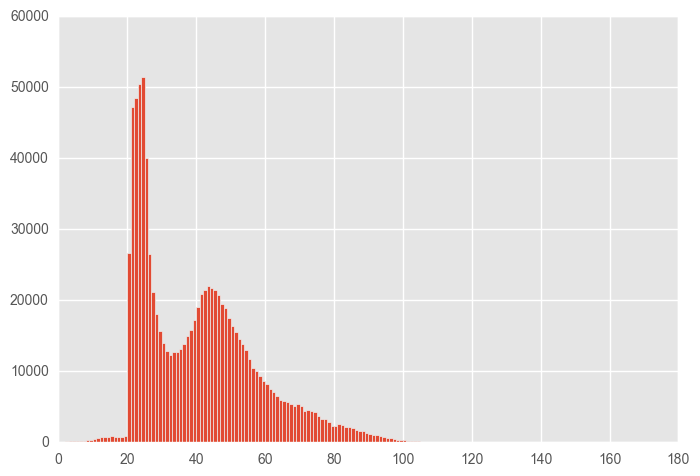

In [3]:
# Set the style to ggplot
plt.style.use('ggplot')

# Calculate the number of bins
NUM_BINS = int(max(df["age"]) - min(df["age"]))

# Show the histogram of age of all people
df["age"].hist(bins = NUM_BINS)
plt.show()

Judging from this graph, we can see that it there seems to be two separate peaks of the data. There is a pick at roughly age 23, 24 and another at roughly age 43, 44. This seems to represent **the baby-boomers and the millienials**. Keep in mind that the data is generated by Santander and does not actually represent the real demographics of the Spanish.

In [4]:
# Describe the data set
print df["age"].dropna().describe()

count    949614.000000
mean         40.154128
std          17.170388
min           2.000000
25%          25.000000
50%          38.000000
75%          50.000000
max         164.000000
Name: age, dtype: float64


The dataset also include some very obvious outlier. The age of the people get as large as 163 and as small as 2 years old. Would we recommend products to anybody who is younger than 15 years old and older than 100 years old? Therefore, as a heuristic, we can remove these people from the equation. We will also not recommend any product (or some kind of default product) for someone whose age is outside of this range.

In [5]:
# Remove all instances of people whose age falls outside of the range
df2 = df[((df["age"] > 15) & (df["age"] < 100)) | pd.isnull(df["age"])]

# Count the number of instances and number of NA
print "Number of rows: " + str(len(df2["age"]))
print "Number of NA's: " + str(len(df2["age"]) - df2["age"].count())

Number of rows: 949498
Number of NA's: 7031


We still have to deal with 7340 instances of people who have their age missing. There should be a good way to fill out these data based on other heuristic. As it stands right now, the plot looks as followed.

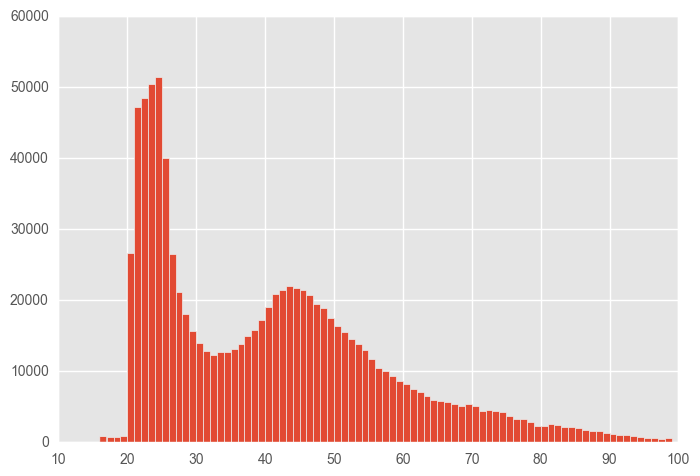

In [6]:
# Calculate the number of bins
NUM_BINS = int(max(df2["age"]) - min(df2["age"]))

# Show the histogram of age of all people
df2["age"].hist(bins = NUM_BINS)
plt.show()

## Incomes of all people

Let's inspect the current income data

In [7]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print df2["gross_income"].dropna().describe()
print
print "Number of NA's: " + str(len(df2["gross_income"]) - df2["gross_income"].count())

count     703661.0
mean      133904.7
std       232805.6
min         1202.7
25%        68374.2
50%       101249.7
75%       155244.7
max     28894395.5
Name: gross_income, dtype: float64

Number of NA's: 245837


Income ranges wildly from 1202.7 to as high as 28894395.5 (28 million). There are also a really large amount of data missing (245781 instances missing). This seems to indicate that some people are simple unwilling to disclose their income and this fact is simulated by Santander. We need to fill out this income somehow. A good way to do some would be to inspect the median income of each city

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


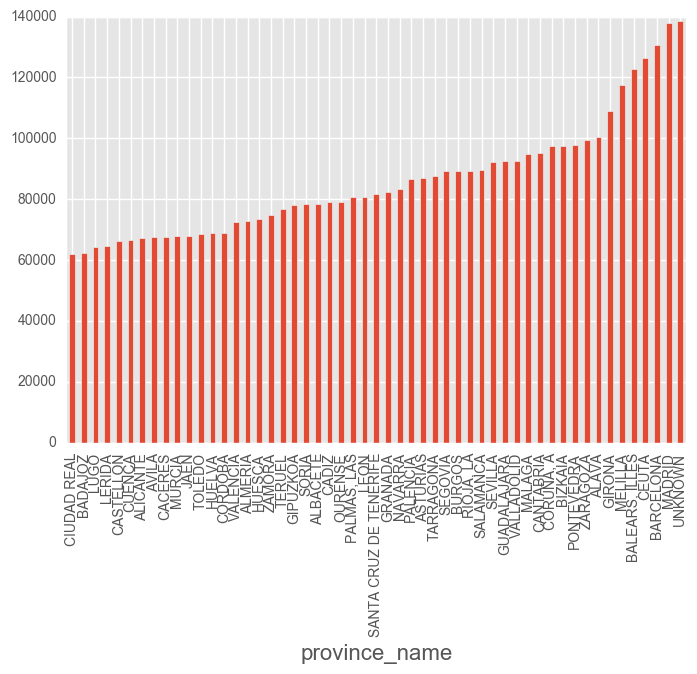

In [8]:
# Rename missing province
df2.loc[df2.province_name.isnull(),"province_name"] = "UNKNOWN"
df2.loc[df2.province_code.isnull(),"province_code"] = -1

# Calculate the median income of each province
median_incomes = df2.loc[df.gross_income.notnull(),:].groupby("province_name").median()
median_incomes.sort_values(by = ("gross_income"), inplace = True)
median_incomes = median_incomes["gross_income"]
incomes_dict = median_incomes.to_dict()

# Visualize the median income of each region
plt.xlabel('xlabel', fontsize=16)
p = median_incomes.plot.bar(x = median_incomes.keys(), y = list(median_incomes))
plt.show()

In [9]:
# Add ALAVA income as similar to RIOJA, LA (due to distance of 2 provinces)
incomes_dict["ALAVA"] = incomes_dict["RIOJA, LA"]

cities = incomes_dict.keys()
for city in cities:
    df2.ix[(df2["province_name"] == city) & (df2["gross_income"].isnull()), "gross_income"] = incomes_dict[city]

In [10]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print df2["gross_income"].dropna().describe()
print
print "Number of NA's: " + str(len(df2["gross_income"]) - df2["gross_income"].count())

count     949498.0
mean      125236.2
std       201414.6
min         1202.7
25%        71883.6
50%        97637.5
75%       137752.7
max     28894395.5
Name: gross_income, dtype: float64

Number of NA's: 0


In [11]:
df[df["province_name"] == "ALAVA"].describe()

df_origin = pd.read_csv("./Data/train_ver2.csv")
df_origin[df_origin["nomprov"] == "ALAVA"].describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,37704.0,37704.0,37704.0,37704.0,37704.0,37704.0,30.0,37704.0,37704.0,37704.0,...,37704.0,37704.0,37704.0,37704.0,37704.0,37704.0,37704.0,37703.0,37703.0,37704.0
mean,780146.7,0.1,1.2,1.0,1.0,0.5,111098.1,0.0,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
std,420584.8,0.2,4.6,0.0,0.0,0.5,58807.6,0.0,0.0,0.5,...,0.1,0.1,0.1,0.1,0.2,0.2,0.1,0.2,0.2,0.3
min,16711.0,0.0,1.0,1.0,1.0,0.0,55271.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,433543.0,0.0,1.0,1.0,1.0,0.0,nan,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,0.0
50%,762391.0,0.0,1.0,1.0,1.0,1.0,nan,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,0.0
75%,1159750.8,0.0,1.0,1.0,1.0,1.0,nan,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,nan,0.0
max,1553397.0,1.0,99.0,1.0,1.0,1.0,253563.3,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


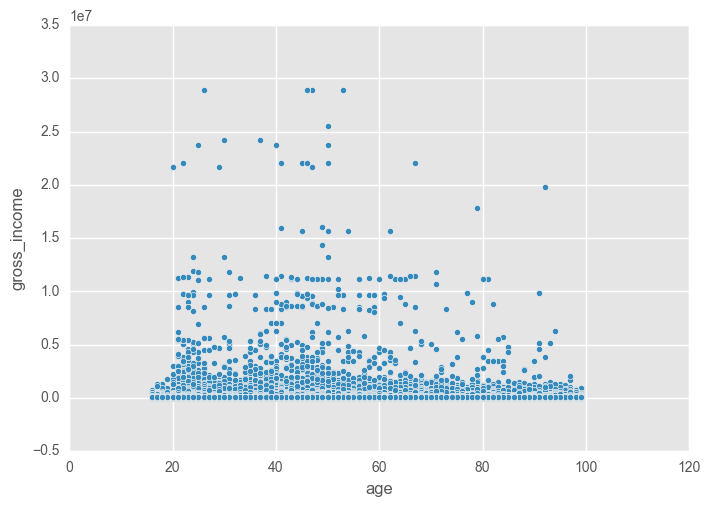

In [12]:
#x = list(df["age"])
#y = list(df["gross_income"])
#plt.plot(x, y)

df2.plot(kind = "scatter", x = "age", y = "gross_income")
plt.show()

There seems to be certain "young and bright" people who already possess an income of over 10 million per year. This is most likely the artifact of Santander's generating algorithm that sometimes put a 20 million annual income to a college student.